In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('../../')

from astroLuSt.preprocessing import photometry as alprph
from astroLuSt.synthetics import images as alsyim

np.random.seed(0)

import importlib
importlib.reload(alprph)
importlib.reload(alsyim)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')

# Determining The Best Aperture

Generate a TPF timeseries

/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/physics/photometry.py:385: RuntimeWarning: divide by zero encountered in log10
  m = -2.5*np.log10(f/f_ref) + m_ref
/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: divide by zero encountered in divide
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \
/home/lukas/github/astroLuSt/demos/preprocessing/../../astroLuSt/physics/photometry.py:388: RuntimeWarning: invalid value encountered in multiply
  dm =  df     *np.abs(-2.5*1/(np.log(10)*f)) \


Shape of generated frames: (10, 15, 15, 3)


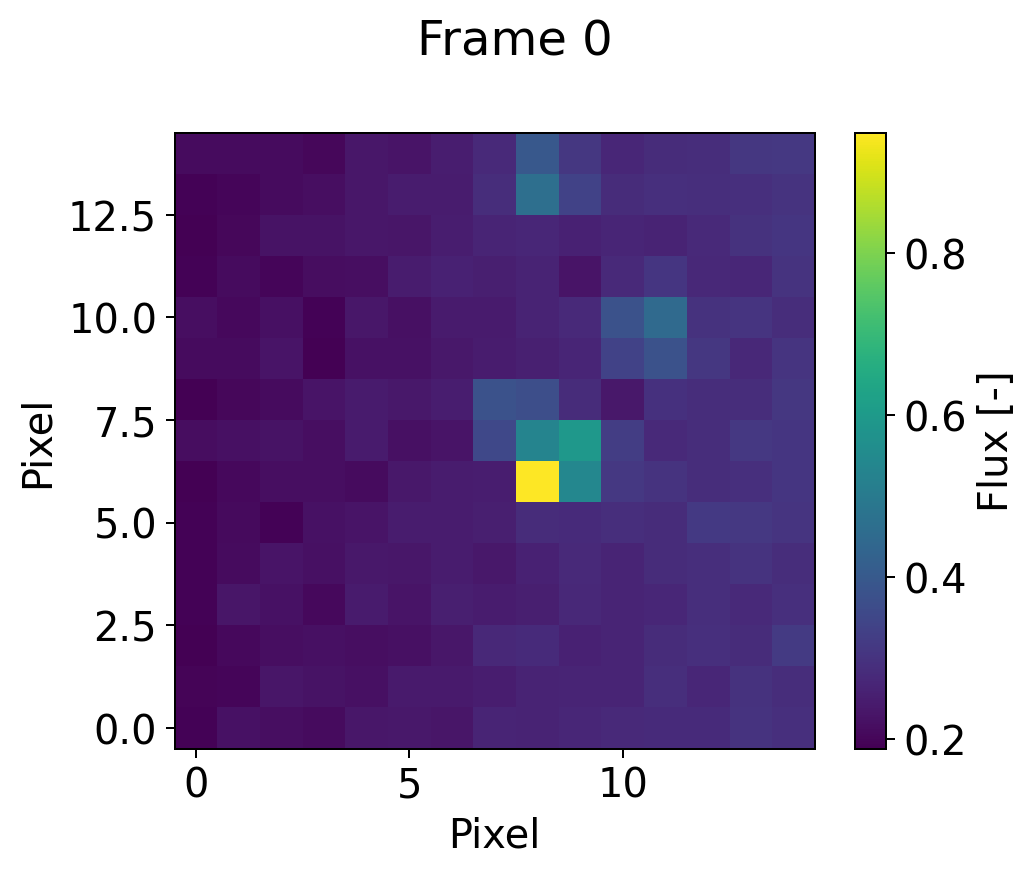

In [2]:

TPFS = alsyim.TPF_Series(
    size=15,
    # mode='mag',
    mode='flux',
    rng=None,
    verbose=0,
)

times = np.linspace(0,10,10)

#one fixed star, 4 random stars
frames, starparams_s = TPFS.rvs(
    times=times,
    variability=None,
    add_stars_kwargs=dict(
        nstars  =5,
        posx    =np.append([7.5], np.random.uniform(0,  15, (4))),
        posy    =np.append([7.5], np.random.uniform(0,  15, (4))),
        f       =np.append([1],   np.random.uniform(0.1, 1, (4))),
        m       =np.append([-2.5],np.random.uniform(-2,  0, (4))),
        aperture=np.append([1],   np.random.uniform(1,   2, (4))),
    ),
    add_noise_kwargs=dict(amplitude=1, bias=1E-1),
    add_custom_kwargs=dict(trend='linearx', amplitude=1E-1),
)

fig, axs, anim = TPFS.plot_result()

print(f'Shape of generated frames: {frames.shape}')


analyze

BestAperture(
    mode='flux',
    store_ring_mask=True,
    store_aperture_masks=True,
    verbose=0,
)


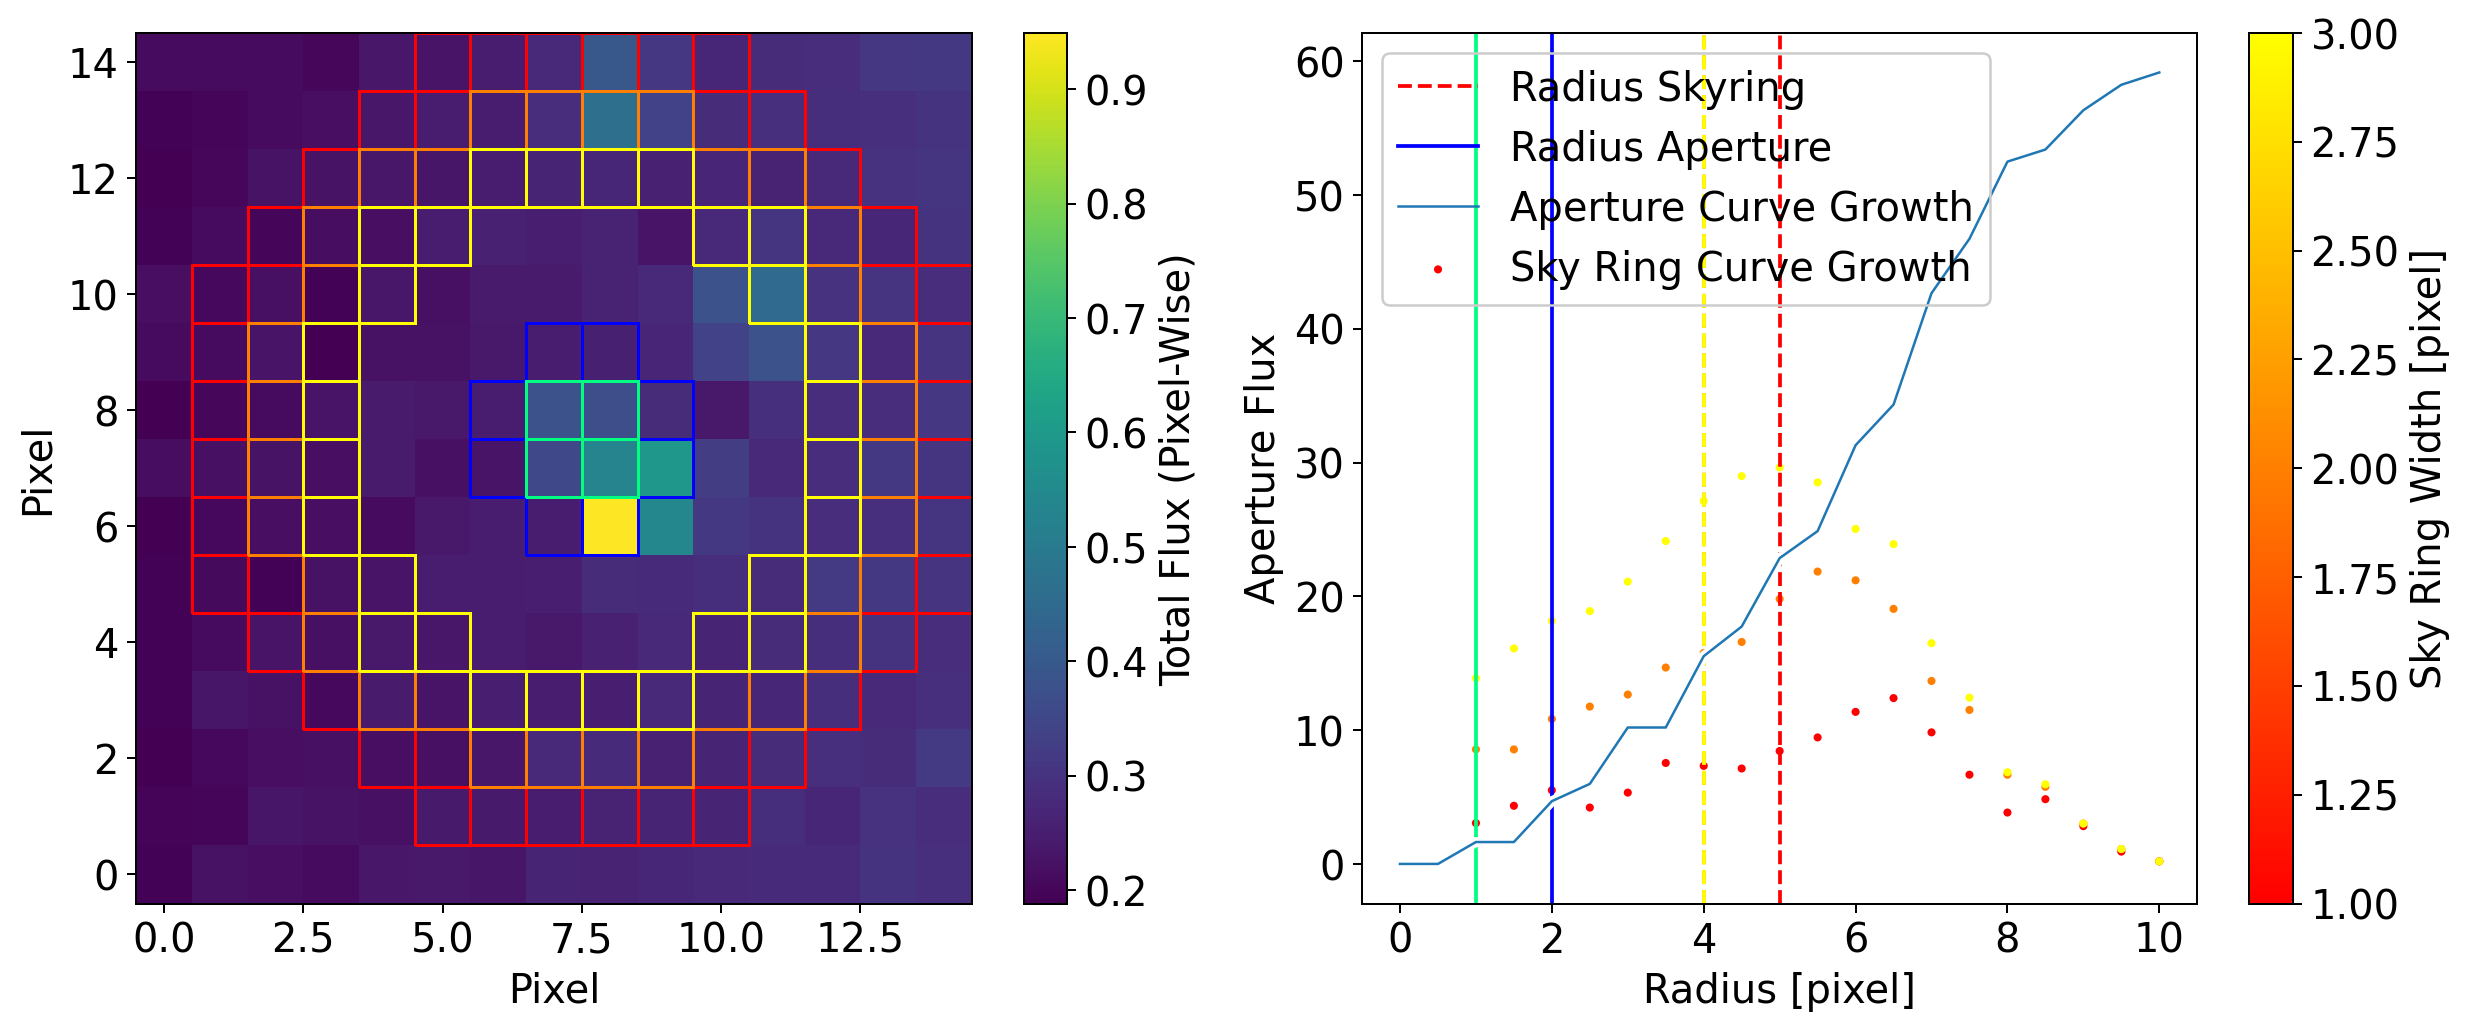

In [4]:
importlib.reload(alprph)
importlib.reload(alsyim)

#test radii of aperture and skyring
r_star = np.linspace(0,10,21)
rw_sky = [[i, j] for i in np.linspace(1,10,19) for j in np.linspace(1,3,3)]
# for rw in rw_sky: print(rw)

#instatiate new estimator
BA = alprph.BestAperture(
    mode='flux',
    # mode='mag',
)
print(BA)


BA.fit(
    x=frames[0],
    posx=7.5, posy=7.5,
    # posx=3, posy=3,
    r_aperture=r_star,
    rw_sky=rw_sky
    # r_sky=r_sky,
    # w_sky=w_sky,
)

# BA.predict()

# BA.fit_predict(
#     frames=frames,
#     posx=7.5, posy=7.5,
#     # posx=3, posy=3,
#     r_aperture=r_star,
#     r_sky=r_sky,
#     w_sky=w_sky,
# )

fig, axs = BA.plot_result(
    plot_aperture_r=np.array([1,2]),
    plot_sky_rings_rw=np.array([[4,2],[4,1],[5,2]]),
    sort_rings_apertures=True,
)
